In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.price.unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [8]:
df.bathrooms.unique()

array([2, 4, 1, 3], dtype=int64)

In [11]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [13]:
#converting catergorical values to numerical values
df1=df.copy()
df1.mainroad.replace(['yes','no'],[1,0]).value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [16]:
df.mainroad.replace(['yes','no'],[1,0],inplace=True)

In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [18]:
df.guestroom.replace(['yes','no'],[1,0],inplace=True)

In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,no,no,no,0,no,furnished


In [20]:
df.basement.replace(['yes','no'],[1,0],inplace=True)

In [21]:
df.hotwaterheating.replace(['yes','no'],[1,0],inplace=True)

In [22]:
df.airconditioning.replace(['yes','no'],[1,0],inplace=True)

In [23]:
df.furnishingstatus.replace(['unfurnished','semi-furnished','furnished'],[0,2,1],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [25]:
df.prefarea .replace(['yes','no'],[1,0],inplace=True)

In [26]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [29]:
df.shape

(545, 13)

In [31]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


<AxesSubplot:>

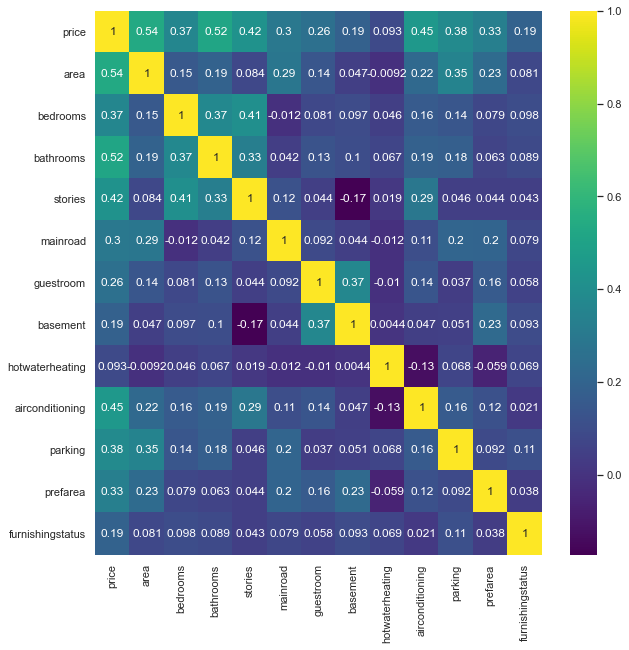

In [35]:
#now we will chech through visualization and EDA
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

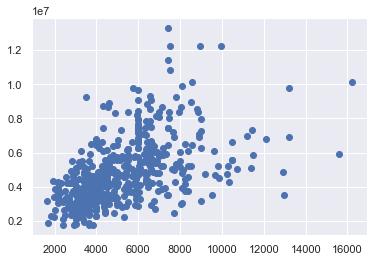

In [36]:
plt.scatter(df.area,df.price)

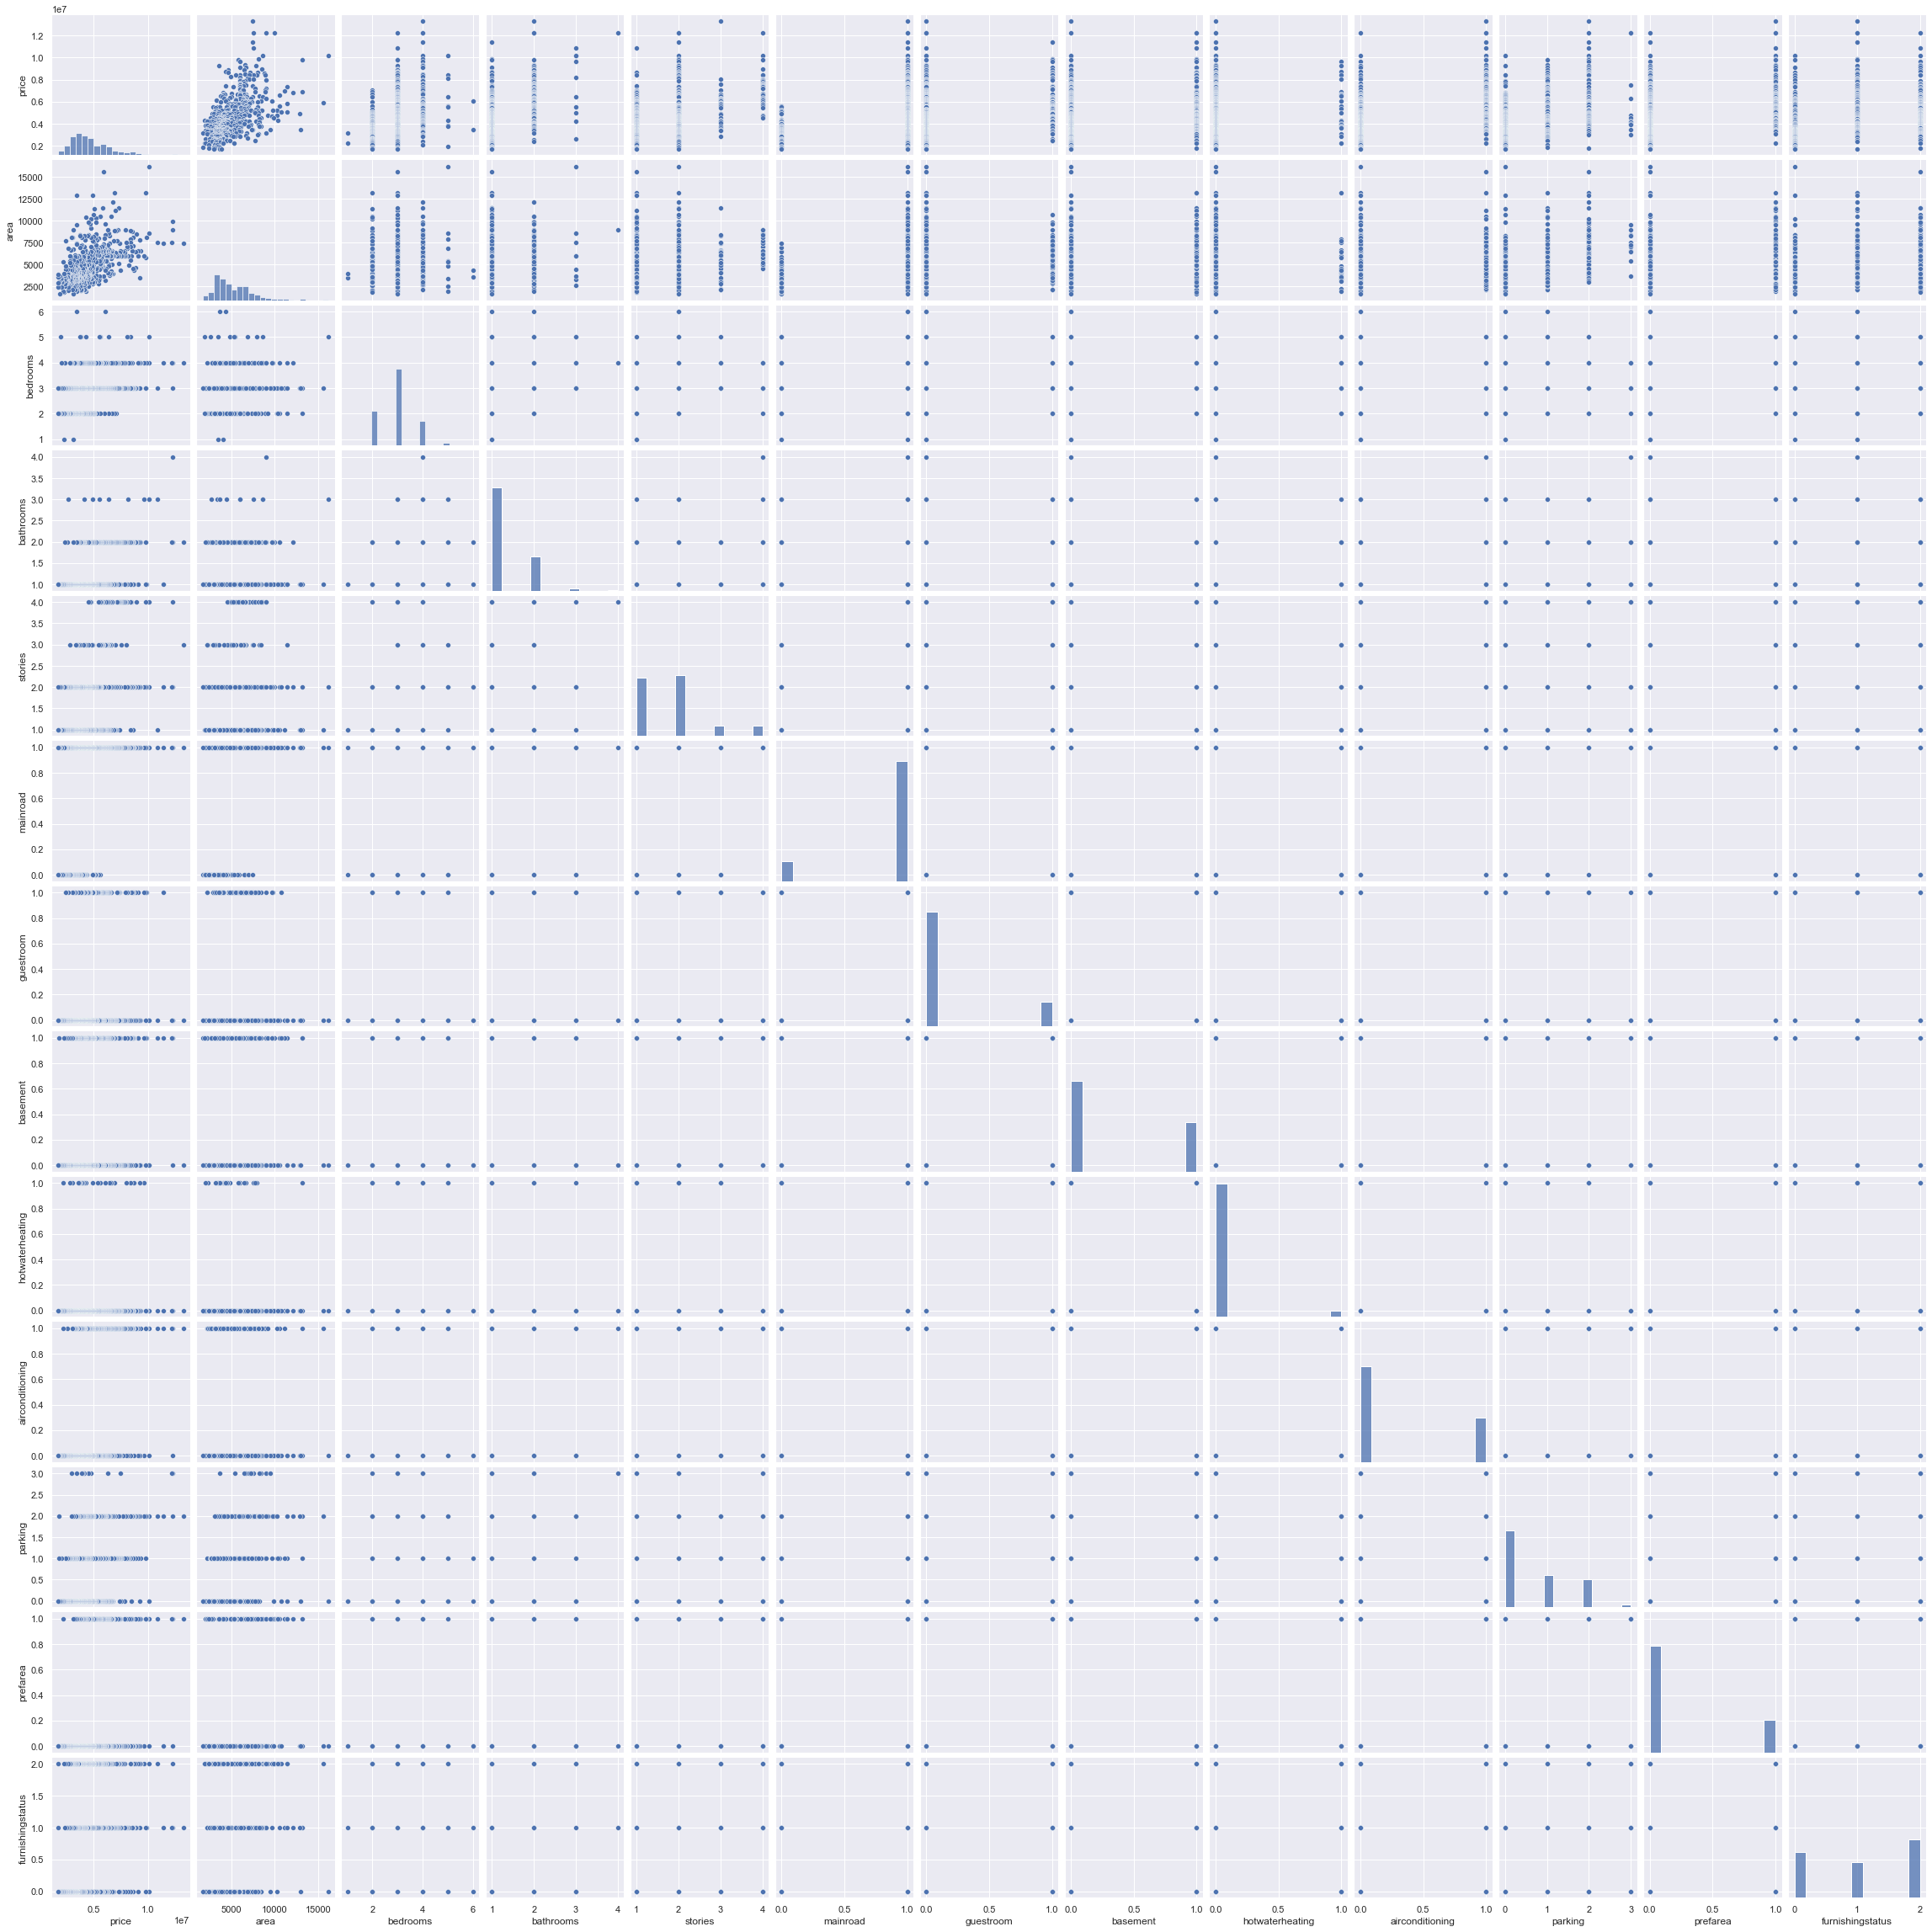

In [37]:
sns.pairplot(df)

<AxesSubplot:>

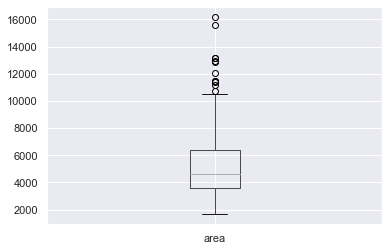

In [43]:
df[['area']].boxplot()

<AxesSubplot:>

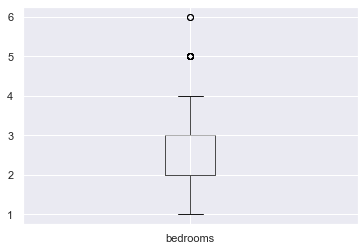

In [44]:
df[['bedrooms']].boxplot()

<AxesSubplot:>

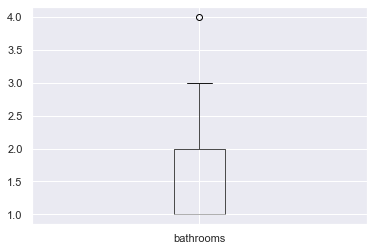

In [46]:
df[['bathrooms']].boxplot()
#like this we can check outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

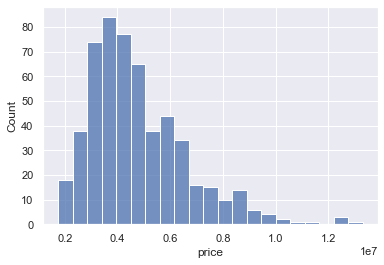

In [47]:
sns.histplot(df.price)

C:\Users\Srinivas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

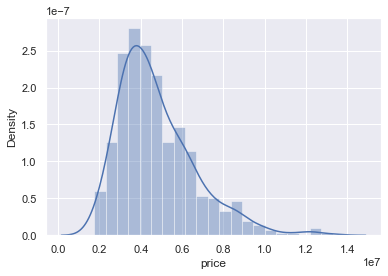

In [49]:






#likewise we can we skewness of each feature

C:\Users\Srinivas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

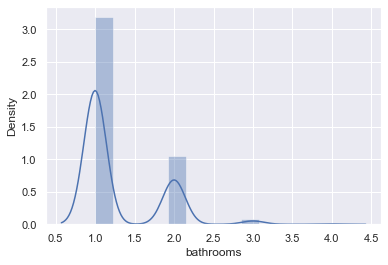

In [66]:
sns.distplot(df["bathrooms"])

In [51]:
#Model creation
# splitting the dataset
inputs = df[df.columns[1:]]
inputs

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [53]:
target=df.price

In [54]:
target

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size = 0.20,random_state = 365)

In [57]:
len(x_train)

436

In [58]:
#creating the regression
model = LinearRegression()

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
model.intercept_

-346416.80981578585

In [61]:
model.coef_

array([2.28200131e+02, 1.38418734e+05, 1.03482319e+06, 4.52047816e+05,
       3.96183559e+05, 2.98023251e+05, 3.79057637e+05, 1.14271529e+06,
       8.46036060e+05, 2.61940035e+05, 7.30302441e+05, 1.79267818e+05])

In [62]:
pred_y=model.predict(x_test)

In [63]:
pred_y

array([5487444.54469575, 6999305.30350251, 6465137.55787651,
       4337721.35178044, 6302553.50655239, 7147941.78808168,
       3308659.07345485, 6220149.69860829, 6221747.34661941,
       2791882.00032526, 4380400.32996919, 3401176.34938908,
       5696357.47846024, 2981389.43101718, 4341509.59668717,
       5626470.79145366, 6288396.43591686, 4672171.50391394,
       4148176.80536043, 6388600.25484877, 3753193.07565904,
       2726588.63055648, 5686289.82066355, 3300818.16605214,
       5292393.8301264 , 4162778.36094475, 8001962.88346264,
       4181049.00805903, 3555650.76583443, 5273475.87296474,
       3752066.62448344, 4405084.11628476, 3584911.31683835,
       4848977.56289011, 4392445.28915072, 5154111.15748658,
       4823890.33888429, 4190765.53822571, 7098122.33638955,
       4881118.65782438, 4441306.09012036, 6345177.57713097,
       5964241.87210852, 3541211.64928751, 5343959.56963322,
       3228087.35524261, 7769573.61769581, 3696449.76132941,
       4025725.90943415,

In [64]:
r2_score(y_test,pred_y)

0.6086723626009841

In [65]:
#we can imporve the accuracy as scalling the data and using the other algorthims)